In [1]:
### Using Panda Data Reader's API Tiingo to read data  
import pandas_datareader as pdr
#Tiingo API Key 
key="b6079ed6e9e3ae43cd97b204a359748d3c63d7dc"

In [2]:
#Using the API to create the data frame for Amazon Ticker
df = pdr.get_data_tiingo('AMZN', api_key=key)

In [3]:
#Converting to CSV
df.to_csv('AMZN.csv')

In [4]:
import pandas as pd

In [5]:
#Reading the Amazon CSV file
df=pd.read_csv('AMZN.csv')

In [6]:
#Reading the first top 5 days data
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AMZN,2016-11-08 00:00:00+00:00,787.75,791.7399,779.10,784.97,3412629,787.75,791.7399,779.10,784.97,3412629,0.0,1.0
1,AMZN,2016-11-09 00:00:00+00:00,771.88,777.5000,760.09,764.00,8562892,771.88,777.5000,760.09,764.00,8562892,0.0,1.0
2,AMZN,2016-11-10 00:00:00+00:00,742.38,778.8300,717.70,778.81,12746994,742.38,778.8300,717.70,778.81,12746994,0.0,1.0
3,AMZN,2016-11-11 00:00:00+00:00,739.01,743.2600,728.90,735.73,6622784,739.01,743.2600,728.90,735.73,6622784,0.0,1.0
4,AMZN,2016-11-14 00:00:00+00:00,719.07,746.0000,710.10,745.51,7321344,719.07,746.0000,710.10,745.51,7321344,0.0,1.0


In [7]:
#Reading the most recent 5 days Amazon stock data
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AMZN,2021-11-01 00:00:00+00:00,3318.11,3375.860,3292.0200,3361.80,3582044,3318.11,3375.860,3292.0200,3361.80,3582044,0.0,1.0
1254,AMZN,2021-11-02 00:00:00+00:00,3312.75,3331.115,3283.5500,3315.01,2562277,3312.75,3331.115,3283.5500,3315.01,2562277,0.0,1.0
1255,AMZN,2021-11-03 00:00:00+00:00,3384.00,3394.920,3297.5200,3309.00,3397189,3384.00,3394.920,3297.5200,3309.00,3397189,0.0,1.0
1256,AMZN,2021-11-04 00:00:00+00:00,3477.00,3498.625,3365.0001,3370.00,5353020,3477.00,3498.625,3365.0001,3370.00,5353020,0.0,1.0
1257,AMZN,2021-11-05 00:00:00+00:00,3518.99,3566.250,3476.9800,3477.00,4996951,3518.99,3566.250,3476.9800,3477.00,4996951,0.0,1.0


In [8]:
#Closing price data frame
df1=df.reset_index()['close']

In [9]:
#Printing the data frame with the close values 
df1

0        787.75
1        771.88
2        742.38
3        739.01
4        719.07
         ...   
1253    3318.11
1254    3312.75
1255    3384.00
1256    3477.00
1257    3518.99
Name: close, Length: 1258, dtype: float64

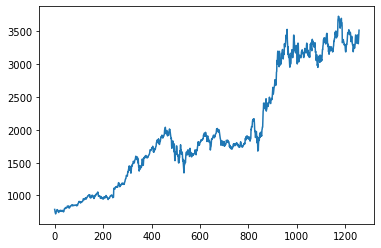

In [10]:
#Using Matplotlib to plot the close values
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
import numpy as np

In [12]:
df1

0        787.75
1        771.88
2        742.38
3        739.01
4        719.07
         ...   
1253    3318.11
1254    3312.75
1255    3384.00
1256    3477.00
1257    3518.99
Name: close, Length: 1258, dtype: float64

In [13]:
#Using sklearn to transform the data and fit the data in the range of 0 to 1.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.02279955]
 [0.01753122]
 [0.00773817]
 ...
 [0.88467105]
 [0.91554406]
 [0.92948339]]


In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(817, 441)

In [17]:
train_data

array([[0.02279955],
       [0.01753122],
       [0.00773817],
       [0.00661944],
       [0.        ],
       [0.00802366],
       [0.00910256],
       [0.01239236],
       [0.01364056],
       [0.0202268 ],
       [0.02199619],
       [0.02026664],
       [0.02034963],
       [0.01583487],
       [0.014424  ],
       [0.01045699],
       [0.00815977],
       [0.00706096],
       [0.01337498],
       [0.01515433],
       [0.01704655],
       [0.01602077],
       [0.01646229],
       [0.01362728],
       [0.01834786],
       [0.0165154 ],
       [0.01391941],
       [0.01284716],
       [0.01557925],
       [0.01731212],
       [0.0171063 ],
       [0.01569212],
       [0.0137833 ],
       [0.01737188],
       [0.01761421],
       [0.01529708],
       [0.01022461],
       [0.01148609],
       [0.01265129],
       [0.02037619],
       [0.02553497],
       [0.0258437 ],
       [0.02550509],
       [0.02654083],
       [0.0313942 ],
       [0.03255609],
       [0.03009288],
       [0.029

In [18]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
# Creating a training and testing data set
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
#Using Keras to create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
#Creating the LSTM model 
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
#Printing the Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
#Training the model with a batch size of 64 and Epoch size of 100
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 334ms/step - loss: 0.0257 - val_loss: 0.1026
Epoch 2/100
12/12 [==============================] - 3s 212ms/step - loss: 0.0049 - val_loss: 0.0226
Epoch 3/100
12/12 [==============================] - 3s 213ms/step - loss: 0.0023 - val_loss: 0.0329
Epoch 4/100
12/12 [==============================] - 2s 207ms/step - loss: 9.5583e-04 - val_loss: 0.0080
Epoch 5/100
12/12 [==============================] - 2s 208ms/step - loss: 6.1794e-04 - val_loss: 0.0030
Epoch 6/100
12/12 [==============================] - 3s 211ms/step - loss: 6.0306e-04 - val_loss: 0.0042
Epoch 7/100
12/12 [==============================] - 3s 211ms/step - loss: 6.3430e-04 - val_loss: 0.0048
Epoch 8/100
12/12 [==============================] - 2s 208ms/step - loss: 5.4205e-04 - val_loss: 0.0042
Epoch 9/100
12/12 [==============================] - 2s 210ms/step - loss: 5.3611e-04 - val_loss: 0.0037
Epoch 10/100
12/12 [==============================] - 2s 209ms/step

In [27]:
import tensorflow as tf

In [28]:

tf.__version__

'2.6.0'

In [29]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [30]:
# Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1586.2666665986476

In [32]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

3021.24504281549

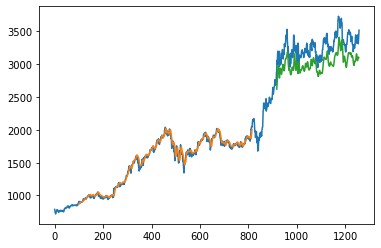

In [33]:
# Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
len(test_data)

441

In [35]:
#Using the test data as input
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
temp_input

[0.919607348440083,
 0.9188305436969267,
 0.9078955230817239,
 0.9249852274311664,
 0.9244474395320582,
 0.9062755200276197,
 0.8904672115365463,
 0.9045526069434392,
 0.9059634702590013,
 0.9033143669041342,
 0.9009275181420423,
 0.9268243292589814,
 0.9815193504053327,
 0.9884375601691707,
 0.9999999999999999,
 0.9959931481838039,
 0.9957308935910288,
 0.9820571383044411,
 0.98349123936873,
 0.966733502858243,
 0.9476221143695599,
 0.9396416075210633,
 0.9474760485204193,
 0.951462982266278,
 0.9690008431983109,
 0.9751787646812776,
 0.9895131359673875,
 0.9651367375528658,
 0.9664413711599621,
 0.9563495488557069,
 0.8659447472728842,
 0.867236102166422,
 0.8787753042485243,
 0.874951034743754,
 0.8820119906783429,
 0.8717043892787667,
 0.8706852480131725,
 0.8636508495056999,
 0.8541665283467338,
 0.8579476420324398,
 0.8547839885271914,
 0.8564504670787493,
 0.8375183412231023,
 0.8239939714640444,
 0.8195223646733104,
 0.8235723723085707,
 0.8454556922525346,
 0.8587045287052592,

In [38]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.80803996]
101
1 day input [0.91883054 0.90789552 0.92498523 0.92444744 0.90627552 0.89046721
 0.90455261 0.90596347 0.90331437 0.90092752 0.92682433 0.98151935
 0.98843756 1.         0.99599315 0.99573089 0.98205714 0.98349124
 0.9667335  0.94762211 0.93964161 0.94747605 0.95146298 0.96900084
 0.97517876 0.98951314 0.96513674 0.96644137 0.95634955 0.86594475
 0.8672361  0.8787753  0.87495103 0.88201199 0.87170439 0.87068525
 0.86365085 0.85416653 0.85794764 0.85478399 0.85645047 0.83751834
 0.82399397 0.81952236 0.82357237 0.84545569 0.85870453 0.85651354
 0.86209724 0.87326132 0.89714308 0.91348254 0.916208   0.91093635
 0.91589263 0.9262633  0.9316445  0.91792095 0.91293811 0.90896114
 0.90658093 0.91514238 0.91927538 0.91073717 0.87528632 0.87126951
 0.88335978 0.89529402 0.89845436 0.89190795 0.86208396 0.85715756
 0.85181952 0.85122861 0.82019626 0.8305603  0.8441743  0.85759244
 0.85300796 0.83895908 0.83930101 0.85156722 0.85673928 0.89297689
 0.90549872 0.90463892 0.89498197

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [40]:
import matplotlib.pyplot as plt

In [41]:
len(df1)

1258

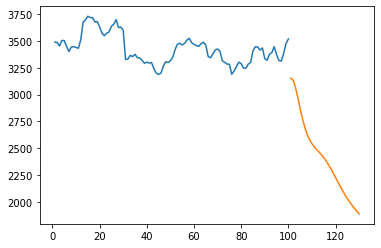

In [42]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

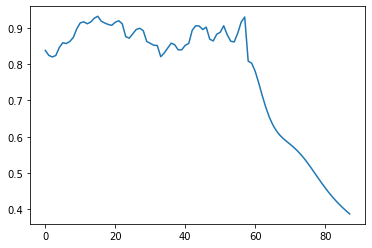

In [43]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [44]:
df3=scaler.inverse_transform(df3).tolist()

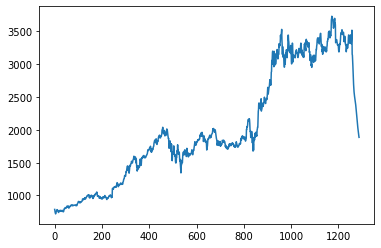

In [45]:
plt.plot(df3)